- PM10 is particulate matter 10 micrometers or less in diameter, 
- PM2.5 is particulate matter 2.5 micrometers or less in diameter. 
- PM2.5 is generally described as fine particles.

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

# Data Sources

In [2]:
aqi_level  = 'Book3.xlsx'
gas_level = 'Book1..xlsx'

# Pandas Dataframes

- AQI data is available for Chennai Location Only  hence ignoring other location for now

In [3]:
aqi_level_df= pd.read_excel(aqi_level, sheet_name='chennai')
gas_level_df = pd.read_excel(gas_level)

# Summary of Data

In [41]:
gas_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
stations                   366 non-null object
Date & Period of Survey    365 non-null object
PM10                       366 non-null int64
PM2.5                      312 non-null float64
SO2                        366 non-null int64
NO2                        366 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 17.3+ KB


# Description 

### Observations
    - all gas ranges
    - mean of all gas level
    - min and max values for each gas
    - distribution of gases in each quantile

In [5]:
gas_level_df.describe()

,PM10,PM2.5,SO2,NO2
count,366.000000,312.000000,366.000000,366.000000
mean,114.035519,41.871795,10.568306,20.295082
std,34.729978,10.247558,1.983350,2.675168
min,11.000000,12.000000,7.000000,1.000000
25%,94.000000,35.000000,10.000000,19.000000
50%,115.500000,44.500000,11.000000,21.000000
75%,135.000000,50.000000,12.000000,22.000000
max,231.000000,59.000000,30.000000,29.000000


# First Look 

In [12]:
aqi_level_df.head()

,CITY,Type,STATION,Date of Sampling,AQI,Remarks
0,CHENNAI,Residential,Anna Nagar - 765,05.06.18,68,Satisfactory
1,CHENNAI,Residential,Anna Nagar - 765,07.06.18,63,Satisfactory
2,CHENNAI,Residential,Anna Nagar - 765,12.06.18,70,Satisfactory
3,CHENNAI,Residential,Anna Nagar - 765,14.06.18,63,Satisfactory
4,CHENNAI,Residential,Anna Nagar - 765,19.06.18,63,Satisfactory


In [11]:
gas_level_df.head() 

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2
0,Anna Nagar,2019-02-01 00:00:00,106,40.0,11,18
1,Anna Nagar,2019-05-07 00:00:00,119,31.0,14,26
2,Nungambakkam,2019-04-07 00:00:00,126,35.0,13,29
3,Anna Nagar,2019-07-01 00:00:00,94,31.0,13,20
4,Nungambakkam,2019-08-01 00:00:00,72,39.0,14,22


# Data Look Based on Stations

In [13]:
gas_level_df.groupby('stations').count()

,Date & Period of Survey,PM10,PM2.5,SO2,NO2
stations,,,,,
Anna Nagar,23,23,22,23,23
Kilpauk,60,60,52,60,60
Nungambakkam,82,82,69,82,82
Nungampakkam,2,2,2,2,2
adyar,68,68,57,68,68
anna nagar,53,54,45,54,54
naungambakkam,1,1,1,1,1
t.nagar,76,76,64,76,76


### Nungambakkam --> is mispelled in 3 rows , handling them

In [20]:
gas_level_df['stations'] = gas_level_df['stations'].str.replace('Nungampakkam', 'Nungambakkam')
gas_level_df['stations'] = gas_level_df['stations'].str.replace('naungambakkam', 'Nungambakkam')

In [24]:
gas_level_df['stations'] = gas_level_df['stations'].str.replace('anna nagar', 'Nungambakkam')
gas_level_df['stations'] = gas_level_df['stations'].str.replace('t.nagar', 't_nagar')

In [26]:
gas_level_df.groupby('stations').count().reset_index()

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2
0,Anna Nagar,23,23,22,23,23
1,Kilpauk,60,60,52,60,60
2,Nungambakkam,138,139,117,139,139
3,adyar,68,68,57,68,68
4,t_nagar,76,76,64,76,76


# Data Distribution of Different Stations
### Observation : 
    - 'Nungambakkam' station has more samples collected
    - 'Anna Nagar' station has less samples collected

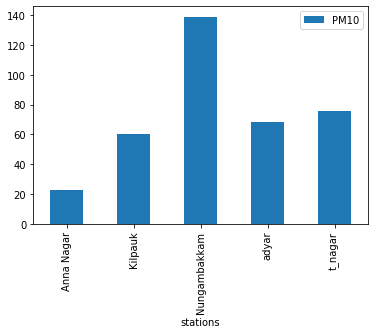

In [32]:
gas_level_df.groupby('stations').count().reset_index().plot('stations', 'PM10', kind='bar')

# Correlation Between Each Values

In [38]:
gases = ['stations', 'SO2', 'NO2', 'PM10', 'PM2.5']


In [59]:
corr = gas_level_df[gas_level_df['stations'] == 't_nagar'][gases].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SO2,NO2,PM10,PM2.5
SO2,1,-0.16,0.11,0.071
NO2,-0.16,1,-0.18,0.092
PM10,0.11,-0.18,1,0.18
PM2.5,0.071,0.092,0.18,1


# Gas Distribution Level 

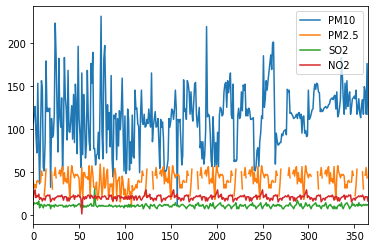

In [60]:
gas_level_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f194a227f60>,
      dtype=object)

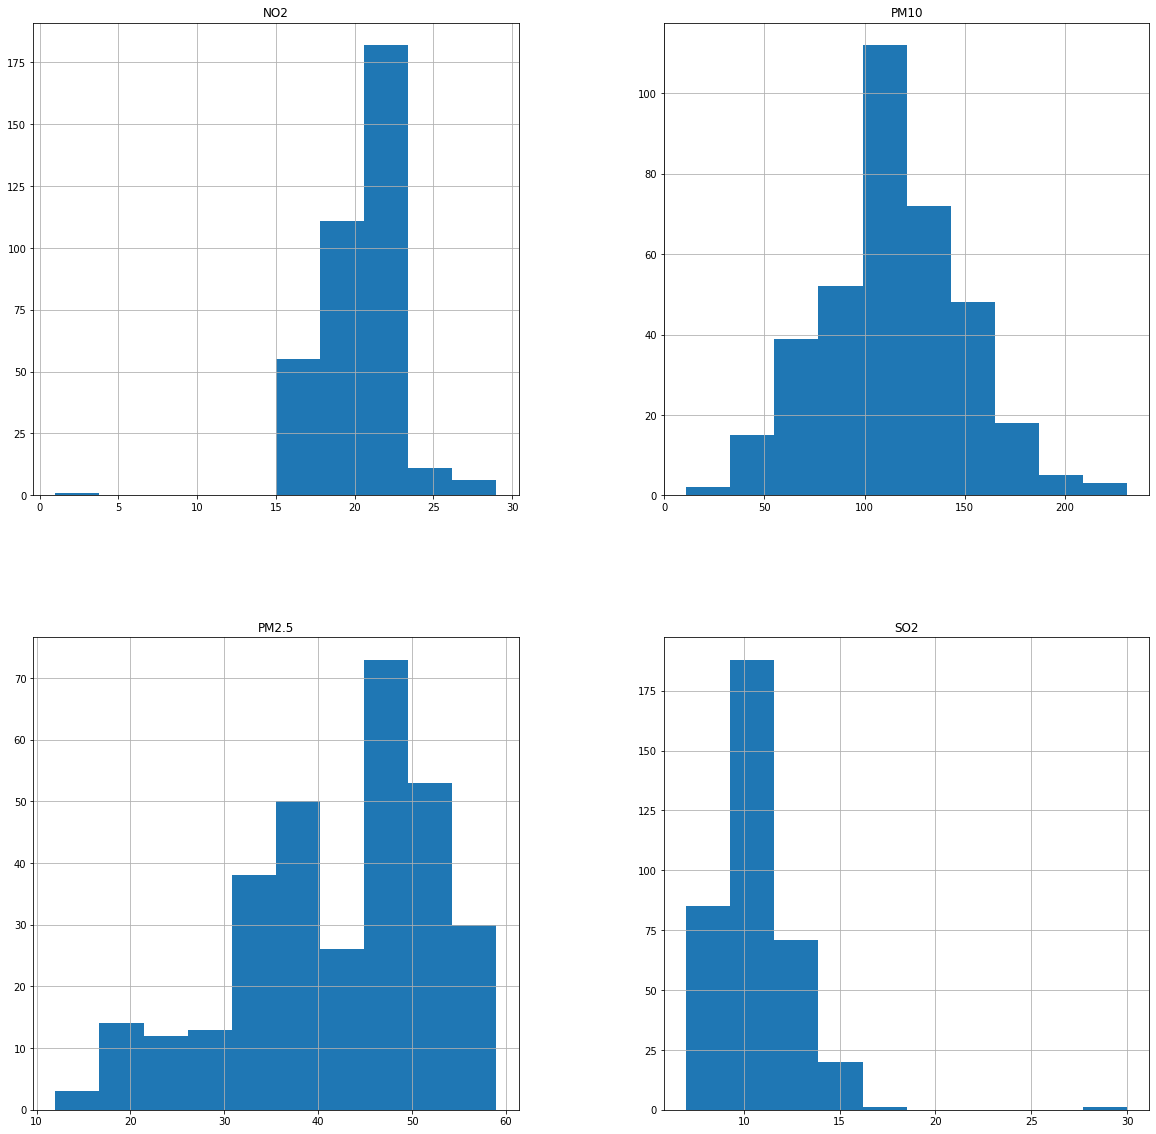

In [61]:
gas_level_df[gases].hist(figsize=(20, 20))

# Area Level Gas Distribution

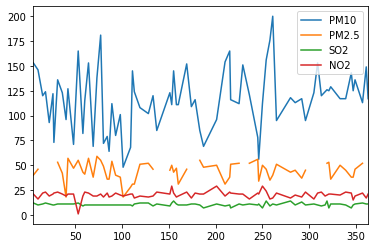

In [84]:
gas_level_df[gas_level_df['stations'] == 't_nagar'].plot()